In [1]:
import os

import numpy as np

from eminus import Atoms, Cell, read, SCF
from eminus.extras import view

try:
    file_path = os.environ['PYTEST_TEST_DIR']
except KeyError:
    file_path = '.'

In [2]:
atoms = Atoms(*read(f'{file_path}/CH4.xyz'), center=True)
atoms.s = 20
scf = SCF(atoms, etol=1e-3, verbose=0)
scf.run();

XYZ file comment: "Experimental geometry from CCCBDB: https://cccbdb.nist.gov/exp2x.asp?casno=74828&charge=0"


In [3]:
# Test normal atoms viewing
view(atoms)

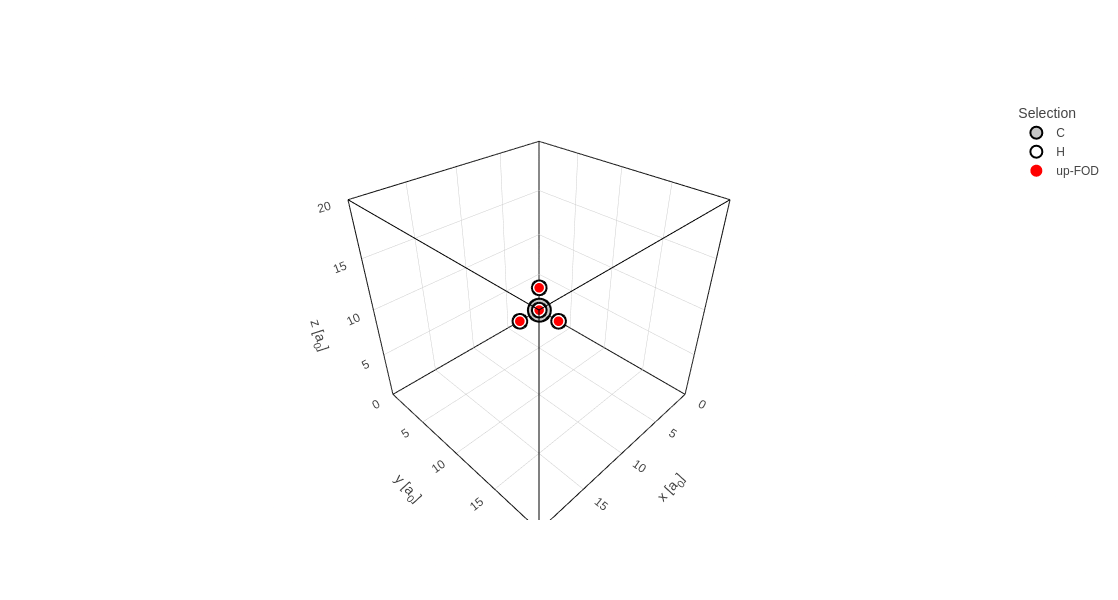

In [4]:
# Test atoms fod viewer
fods = [atoms.pos]
view(atoms, fods=fods)

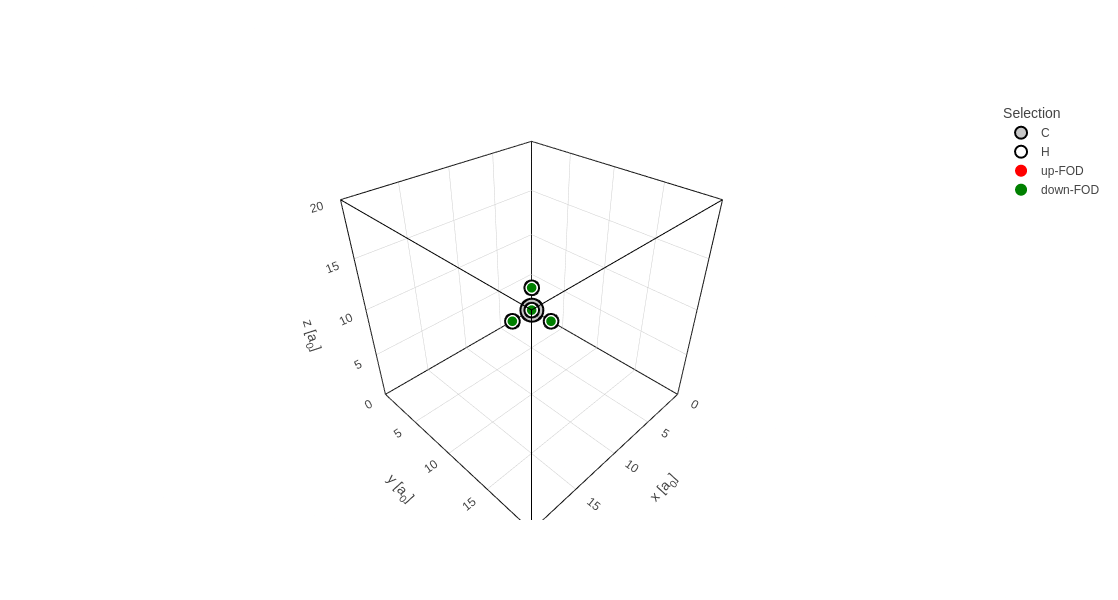

In [5]:
# Test atoms fod viewer
fods = [atoms.pos, atoms.pos]
view(atoms, fods=fods)

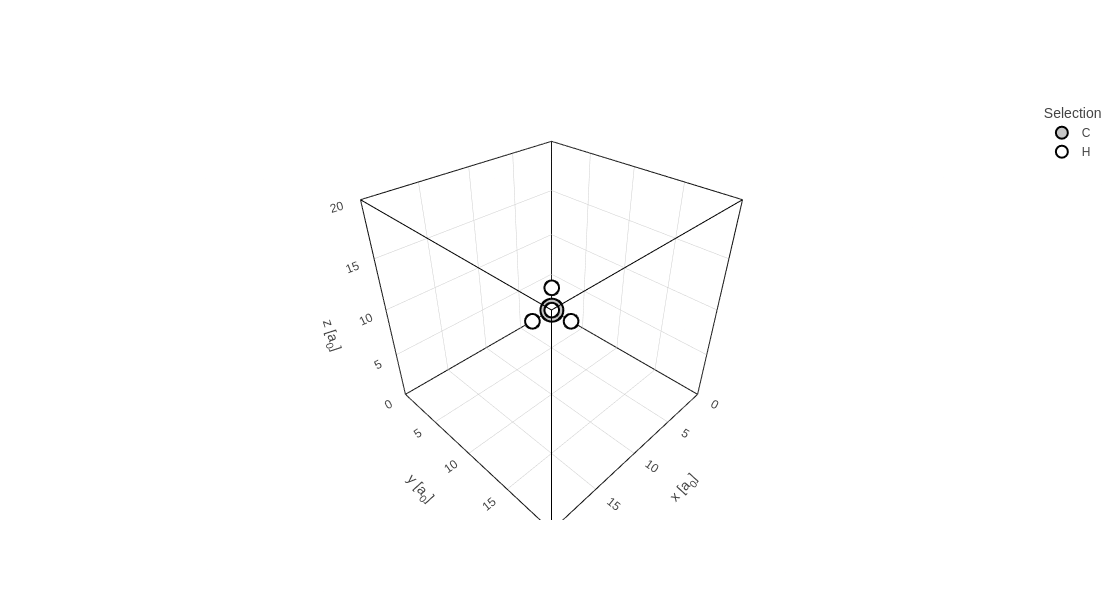

In [6]:
# Test normal scf viewing
view(scf)

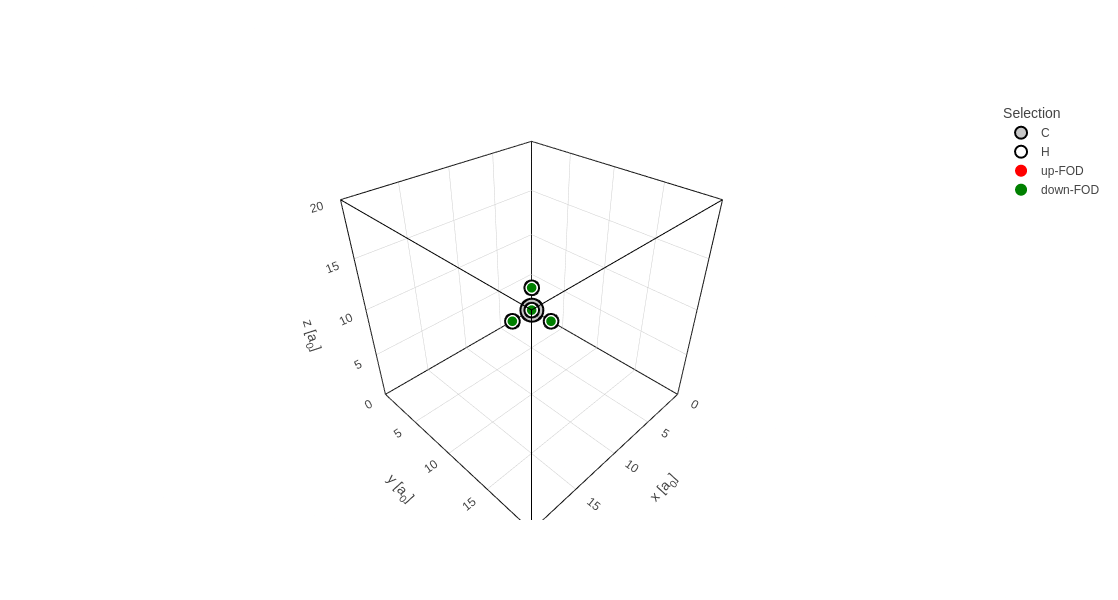

In [7]:
# Test scf fod viewer
view(scf, fods=fods)

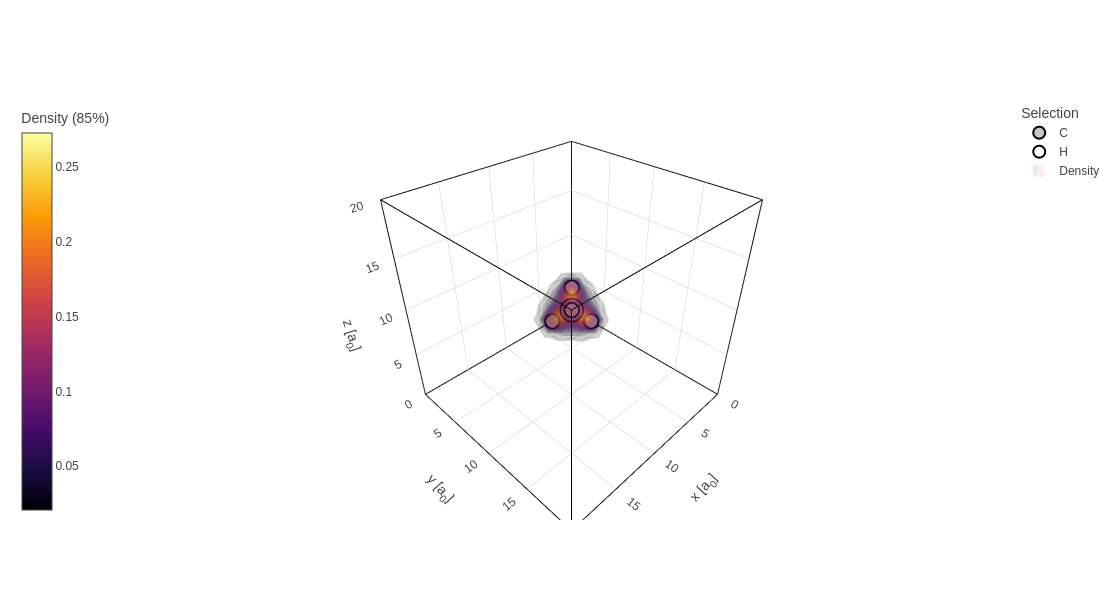

In [8]:
# Test scf density viewer
view(scf, plot_n=True)

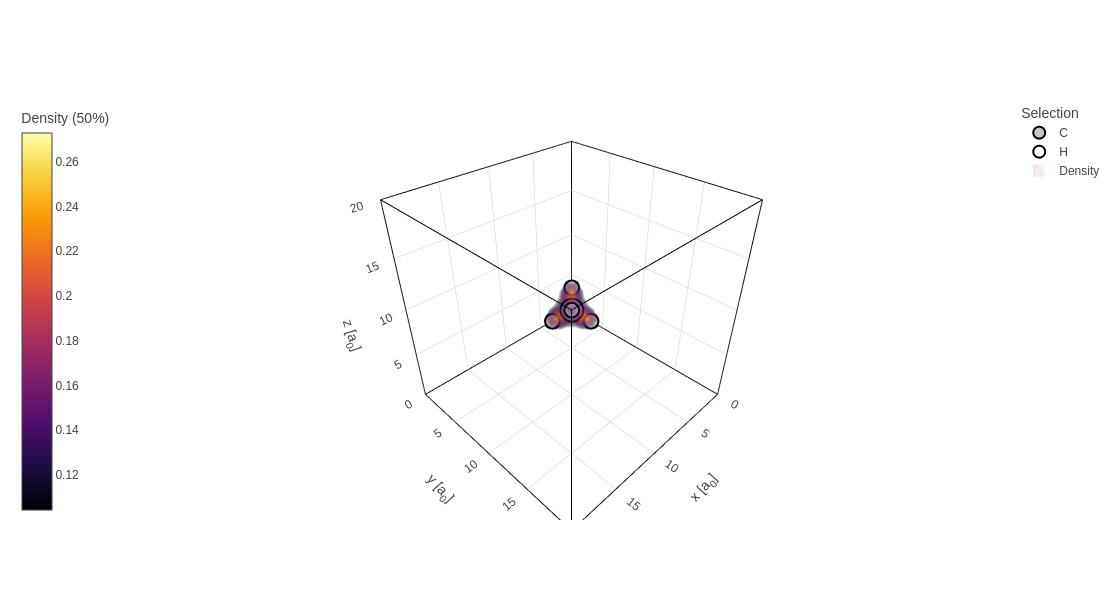

In [9]:
# Test scf density percent viewer
view(scf, plot_n=True, percent=50)

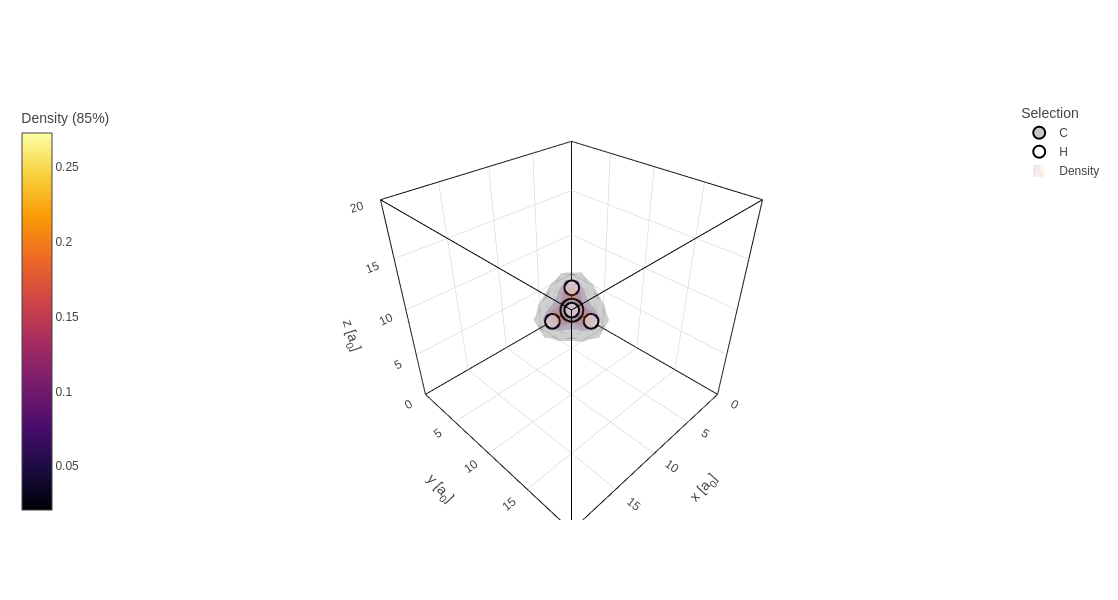

In [10]:
# Test scf density surface viewer
view(scf, plot_n=True, surfaces=5)

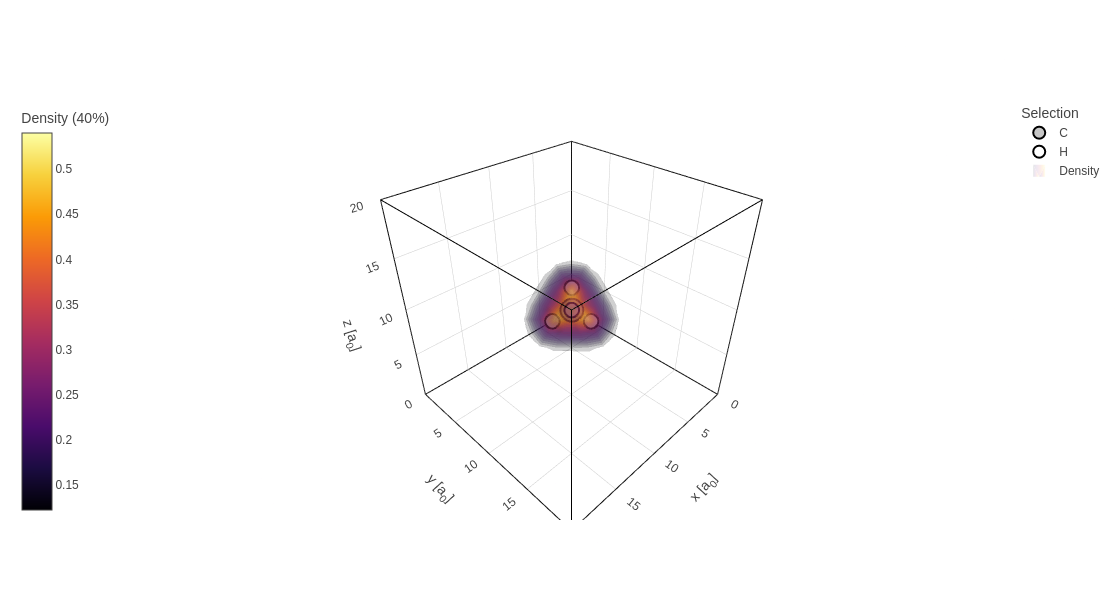

In [11]:
# Test density viewer with custom arrays
assert scf.exc is not None
view(scf, plot_n=np.abs(scf.exc), percent=40)

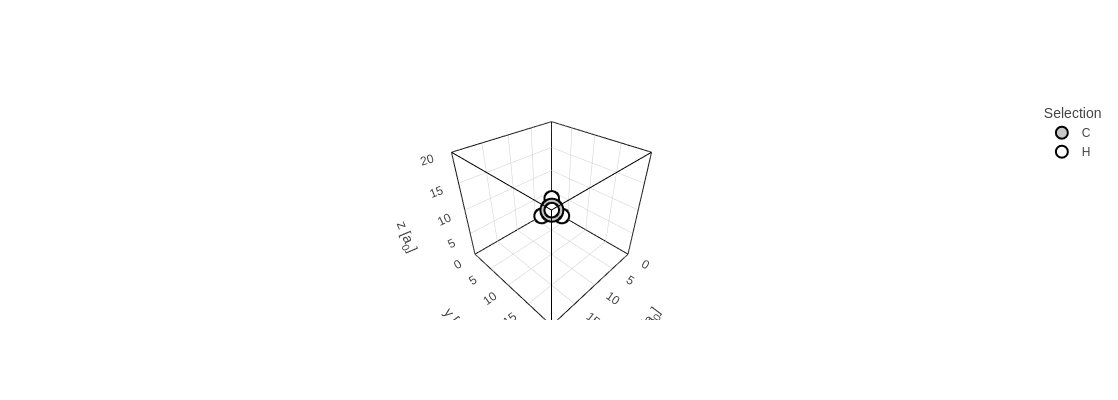

In [12]:
# Test viewer with custom sizes
view(scf, size=(600, 400))

In [13]:
atoms = Cell('He', 'hexagonal', 10, 5, basis=[[0.5, 0.5, 0.5]])
scf = SCF(atoms, etol=1e-3, verbose=0)
scf.run();

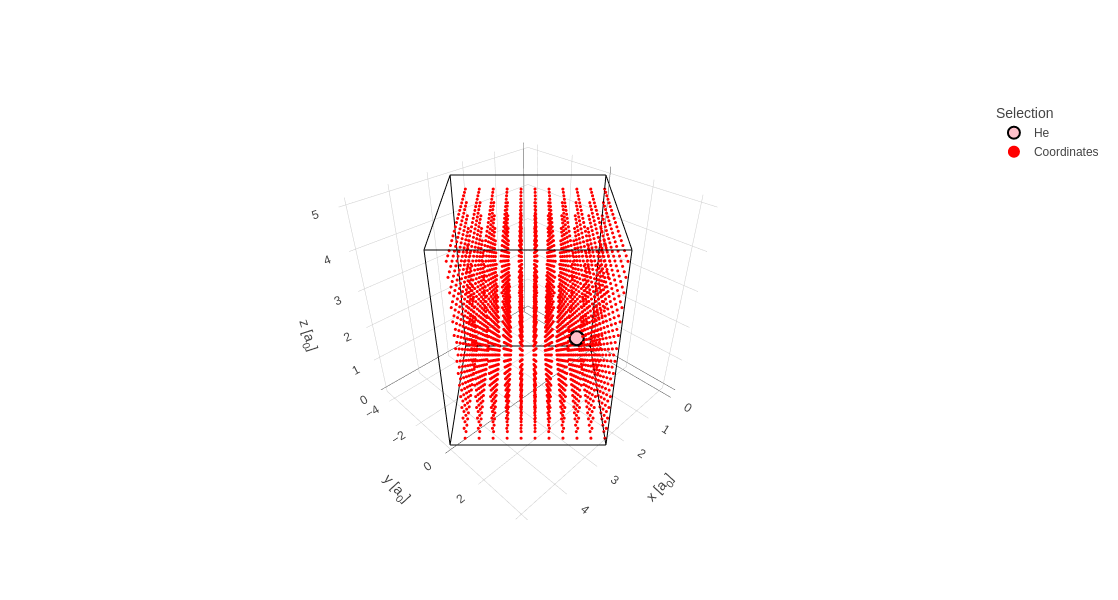

In [14]:
# View grid points with a non-cubic unit cell
view(atoms, atoms.r)

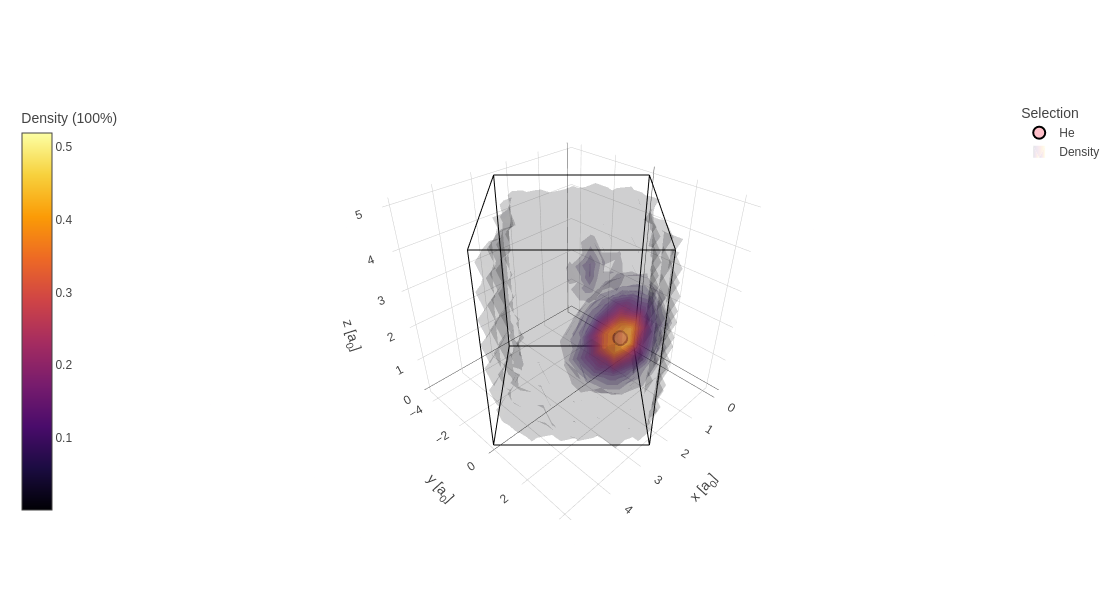

In [15]:
# View density with a non-cubic unit cell
view(scf, plot_n=True)